In [1]:
import pandas as pd
import numpy as np
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from tensorflow.keras.layers import Dense, Dropout
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
stolen_df = pd.read_csv('stolen_df_2.csv')
stolen_df.head()

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,Arm_Strength_3,Sprint_3,Result_4,Exchange_4,Arm_Strength_4,Sprint_4,Result_5,Exchange_5,Arm_Strength_5,Sprint_5
0,1,0.74,84.9,28.0,2021-04-01,545341,Randal Grichuk,1,0.74,84.9,...,84.9,27.0,0,0.74,84.9,27.7,0,0.74,84.9,25.0
1,0,0.75,81.4,27.3,2021-04-01,643565,Mike Tauchman,0,0.75,81.4,...,81.4,NaN,1,0.75,81.4,30.5,1,0.75,81.4,NaN
2,0,0.75,81.4,27.3,2021-04-01,643565,Mike Tauchman,0,0.75,81.4,...,81.4,NaN,1,0.75,81.4,30.5,1,0.75,81.4,NaN
3,0,0.73,79.0,27.9,2020-09-30,666185,Dylan Carlson,0,0.73,79.0,...,79.0,27.6,1,0.73,79.0,27.6,0,0.73,79.0,28.6
4,1,0.7,83.2,27.8,2020-09-30,502054,Tommy Pham,1,0.70,83.2,...,83.2,NaN,1,0.70,83.2,NaN,1,0.70,83.2,27.4


In [3]:
stolen_df.columns

Index(['Result', 'Exchange', 'Arm_Strength', 'Sprint', 'Date', 'runner_id',
       'runner_name', 'Result_1', 'Exchange_1', 'Arm_Strength_1', 'Sprint_1',
       'Result_2', 'Exchange_2', 'Arm_Strength_2', 'Sprint_2', 'Result_3',
       'Exchange_3', 'Arm_Strength_3', 'Sprint_3', 'Result_4', 'Exchange_4',
       'Arm_Strength_4', 'Sprint_4', 'Result_5', 'Exchange_5',
       'Arm_Strength_5', 'Sprint_5'],
      dtype='object')

In [4]:
stolen_df.dropna(inplace=True)

In [5]:
len(stolen_df)

12768

In [28]:
stolen_df.replace(' --', 0, inplace=True)
test_df = stolen_df.loc[stolen_df['Date'] < '2022-09-30']
validate_df = stolen_df.loc[stolen_df['Date'] > '2022-09-30']

In [52]:


chosen = 'Result'

X = test_df.drop(columns=[chosen, 'Date', 'runner_id', 'runner_name'])

# Define the target set.
y = test_df[chosen].ravel()
y[:5]

array([1, 0, 1, 1, 1])

In [53]:

# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from tensorflow.keras.layers import Dense, Dropout

In [54]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

ran = RandomOverSampler(random_state=0)
X_train, y_train = ran.fit_resample(X_train, y_train)


# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=70, activation="tanh", input_dim=23))

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=60, activation="tanh"))

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=60, activation="tanh"))

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=60, activation="tanh"))



# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 70)                1680      
                                                                 
 dense_21 (Dense)            (None, 60)                4260      
                                                                 
 dense_22 (Dense)            (None, 60)                3660      
                                                                 
 dense_23 (Dense)            (None, 60)                3660      
                                                                 
 dense_24 (Dense)            (None, 1)                 61        
                                                                 
Total params: 13,321
Trainable params: 13,321
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Define precision metric outside the function
precision_metric = tf.keras.metrics.Precision()

# Custom metric function using the predefined precision_metric object
def custom_precision_metric(y_true, y_pred):
    precision_metric.update_state(y_true, y_pred)
    return precision_metric.result()

# Compile the model with the custom precision metric
nn_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics='accuracy'
)

In [56]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=150, shuffle=True)

Epoch 1/150


2025-01-17 17:53:09.420555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


384/384 [==============================] - 5s 12ms/step - loss: 0.4357 - accuracy: 0.8064
Epoch 2/150
384/384 [==============================] - 5s 12ms/step - loss: 0.3782 - accuracy: 0.8371
Epoch 3/150
384/384 [==============================] - 5s 12ms/step - loss: 0.3347 - accuracy: 0.8585
Epoch 4/150
384/384 [==============================] - 4s 12ms/step - loss: 0.2976 - accuracy: 0.8775
Epoch 5/150
384/384 [==============================] - 4s 11ms/step - loss: 0.2647 - accuracy: 0.8949
Epoch 6/150
384/384 [==============================] - 4s 12ms/step - loss: 0.2310 - accuracy: 0.9080
Epoch 7/150
384/384 [==============================] - 4s 12ms/step - loss: 0.2018 - accuracy: 0.9212
Epoch 8/150
384/384 [==============================] - 4s 12ms/step - loss: 0.1689 - accuracy: 0.9379
Epoch 9/150
384/384 [==============================] - 4s 12ms/step - loss: 0.1392 - accuracy: 0.9522
Epoch 10/150
384/384 [==============================] - 4s 12ms/step - loss: 0.1218 - accuracy

384/384 [==============================] - 4s 11ms/step - loss: 6.8414e-06 - accuracy: 1.0000
Epoch 80/150
384/384 [==============================] - 4s 12ms/step - loss: 5.5225e-06 - accuracy: 1.0000
Epoch 81/150
384/384 [==============================] - 5s 12ms/step - loss: 4.4845e-06 - accuracy: 1.0000
Epoch 82/150
384/384 [==============================] - 5s 12ms/step - loss: 3.6113e-06 - accuracy: 1.0000
Epoch 83/150
384/384 [==============================] - 5s 12ms/step - loss: 2.9345e-06 - accuracy: 1.0000
Epoch 84/150
384/384 [==============================] - 5s 12ms/step - loss: 2.3942e-06 - accuracy: 1.0000
Epoch 85/150
384/384 [==============================] - 4s 12ms/step - loss: 1.9274e-06 - accuracy: 1.0000
Epoch 86/150
384/384 [==============================] - 4s 12ms/step - loss: 2.0178e-06 - accuracy: 1.0000
Epoch 87/150
384/384 [==============================] - 4s 12ms/step - loss: 0.0954 - accuracy: 0.9791
Epoch 88/150
384/384 [==============================] 

<AxesSubplot:>

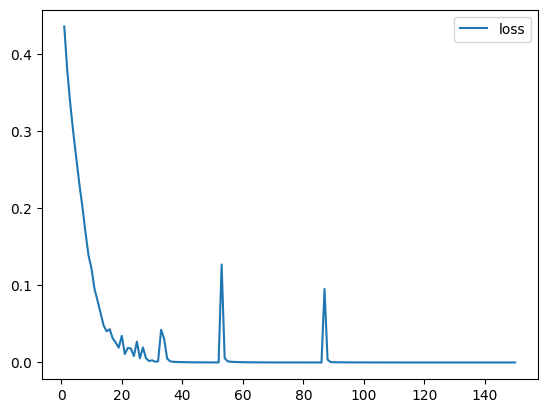

In [57]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

history_df.plot(y="loss")

<AxesSubplot:>

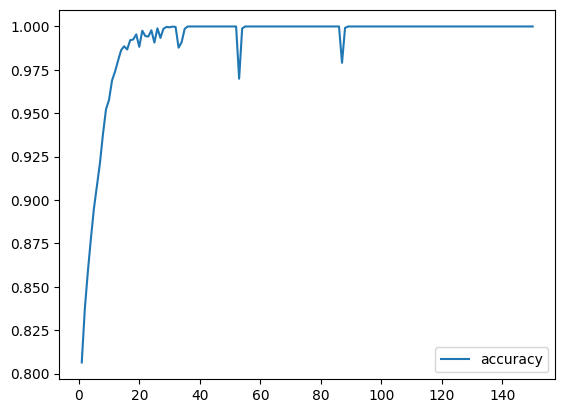

In [58]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [59]:

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2025-01-17 18:04:19.348227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


84/84 - 1s - loss: 0.2879 - accuracy: 0.9828 - 837ms/epoch - 10ms/step
Loss: 0.2878663241863251, Accuracy: 0.9828358292579651


In [60]:
chosen = 'Result'

X = validate_df.drop(columns=[chosen, 'Date', 'runner_id', 'runner_name'])

# Define the target set.
y = validate_df[chosen].ravel()
y[:5]

array([1, 1, 1, 1, 1])

In [61]:
X_scaled = X_scaler.transform(X)

predictions = nn_model.predict(X_scaled)

results = np.round(predictions).astype(int).tolist()

29/65 [============>.................] - ETA: 0s

2025-01-17 18:04:20.143160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 0s 4ms/step


In [66]:
predictions

array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [9.9089909e-01],
       [4.2533683e-09],
       [1.0000000e+00]], dtype=float32)

In [62]:

print(classification_report(y, results))

              precision    recall  f1-score   support

           0       0.46      0.48      0.47       370
           1       0.88      0.88      0.88      1681

    accuracy                           0.80      2051
   macro avg       0.67      0.68      0.67      2051
weighted avg       0.81      0.80      0.81      2051



In [63]:
import joblib
joblib.dump(X_scaler, 'deep_stolen_scale.pkl')
joblib.dump(nn_model, 'deep_stolen.pkl')

INFO:tensorflow:Assets written to: ram://726d34bd-8698-43af-9aa9-092524f778a6/assets


['deep_stolen.pkl']

In [65]:
X.columns

Index(['Exchange', 'Arm_Strength', 'Sprint', 'Result_1', 'Exchange_1',
       'Arm_Strength_1', 'Sprint_1', 'Result_2', 'Exchange_2',
       'Arm_Strength_2', 'Sprint_2', 'Result_3', 'Exchange_3',
       'Arm_Strength_3', 'Sprint_3', 'Result_4', 'Exchange_4',
       'Arm_Strength_4', 'Sprint_4', 'Result_5', 'Exchange_5',
       'Arm_Strength_5', 'Sprint_5'],
      dtype='object')